<a href="https://colab.research.google.com/github/KimaruThagna/data-science-in-pycaret/blob/main/telco_churn_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Churn Analysis
In this analysis, I am setting out to answer two business questions
1. How to efficiently and quickly compare different ML algorithms in the classification of the telco churn dataset
2. What are the top determinants of churn? 
3. In each of the determinant, what would likely lead to churn and what would not?

In [1]:
pip install pycaret shap sweetviz

In [2]:
import sweetviz as sv
import pandas as pd


In [3]:
telco_df = pd.read_csv('telecom_users.csv')
telco_df.drop(['Unnamed: 0'],axis=1,inplace=True)
#telco_df.set_index('id')
telco_df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,Yes,No,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5981,0684-AOSIH,Male,0,Yes,No,1,Yes,No,Fiber optic,Yes,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.00,95,Yes
5982,5982-PSMKW,Female,0,Yes,Yes,23,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),91.10,2198.3,No
5983,8044-BGWPI,Male,0,Yes,Yes,12,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,21.15,306.05,No
5984,7450-NWRTR,Male,1,No,No,12,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.45,1200.15,Yes



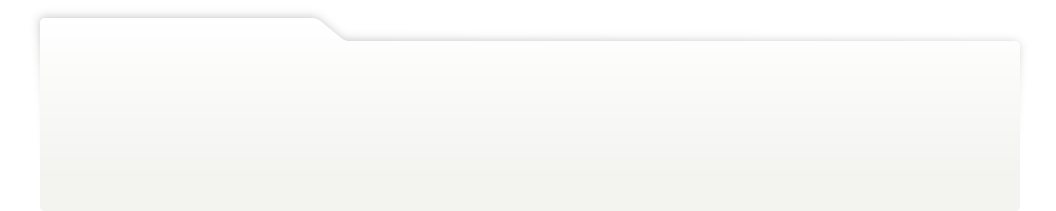
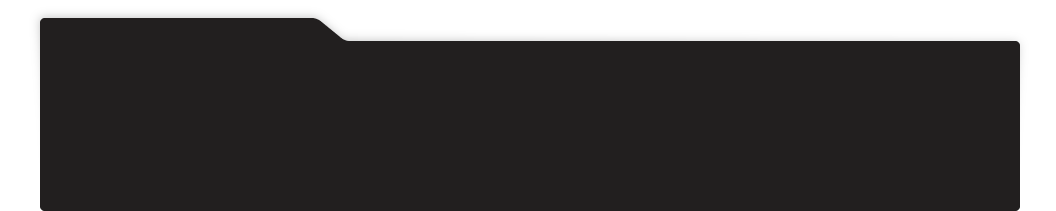
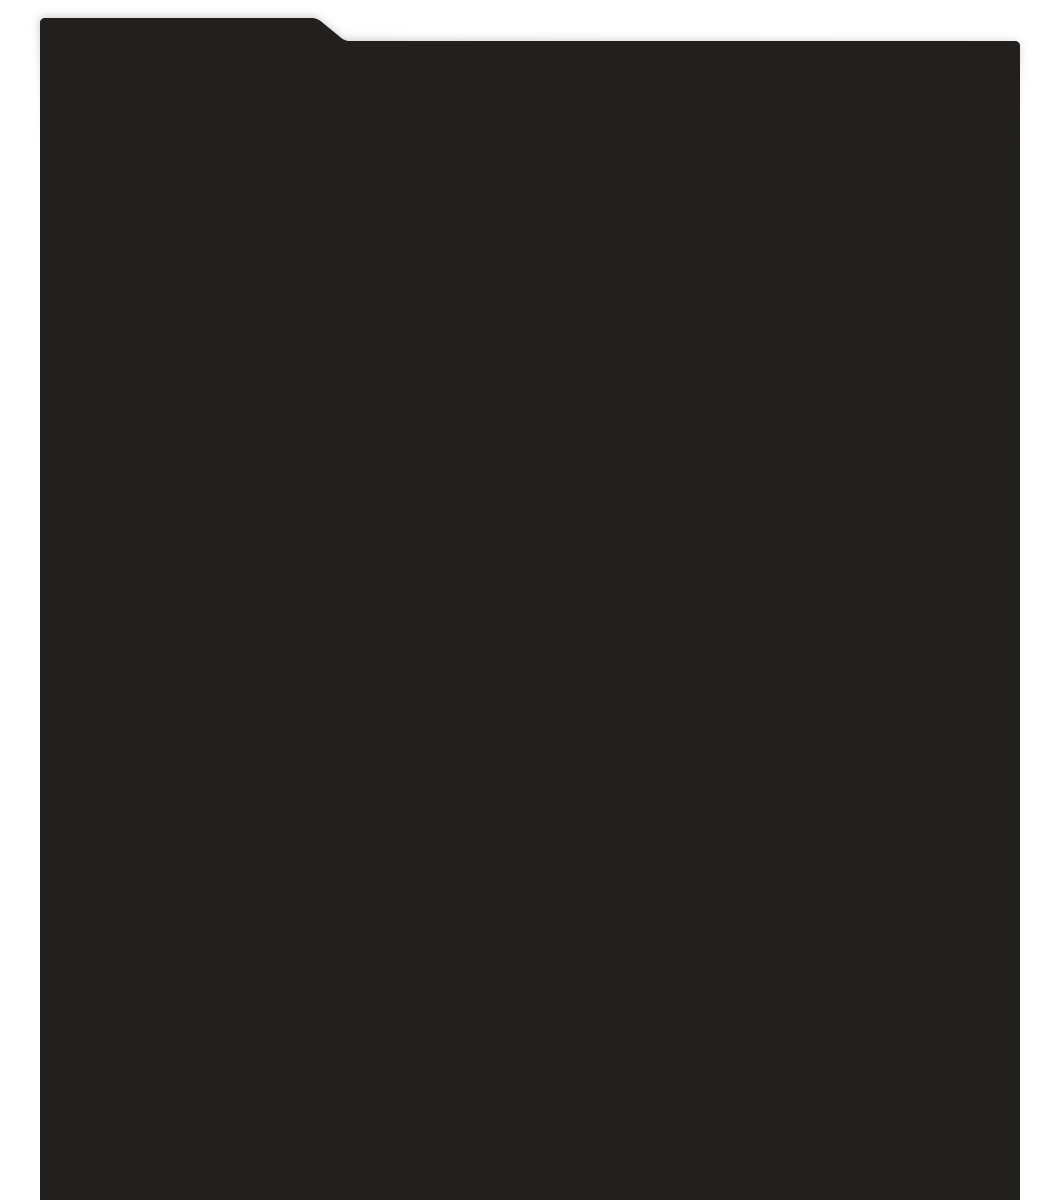
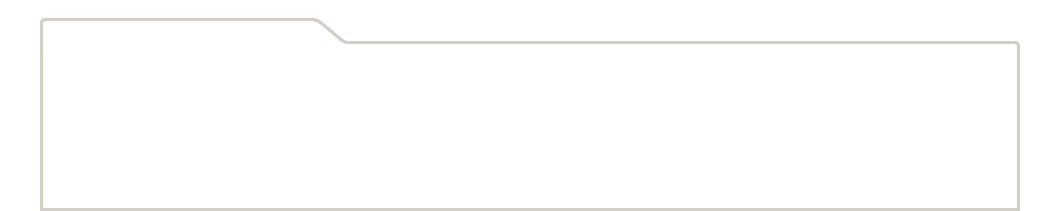
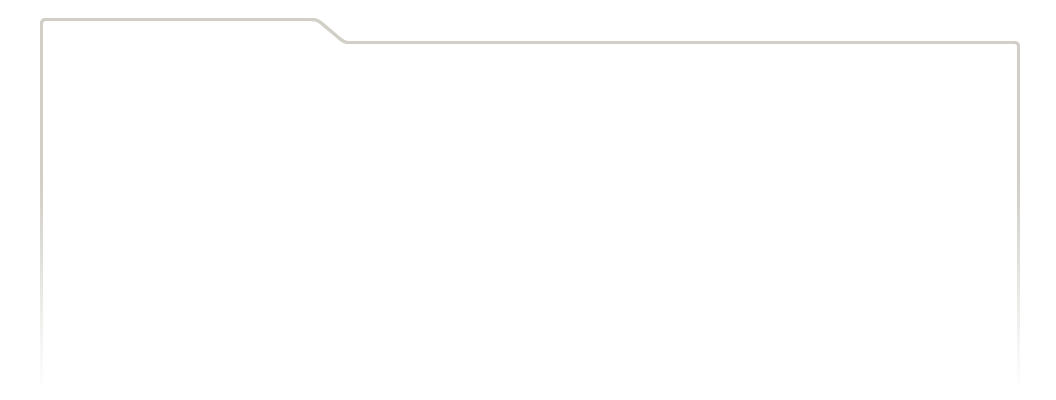
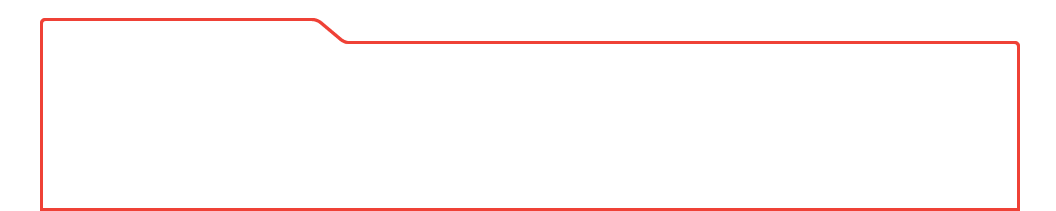
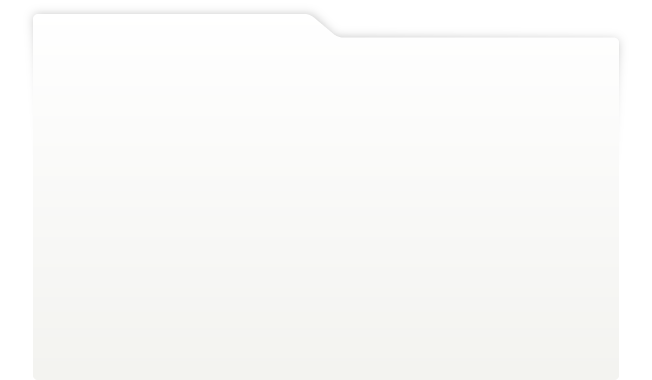
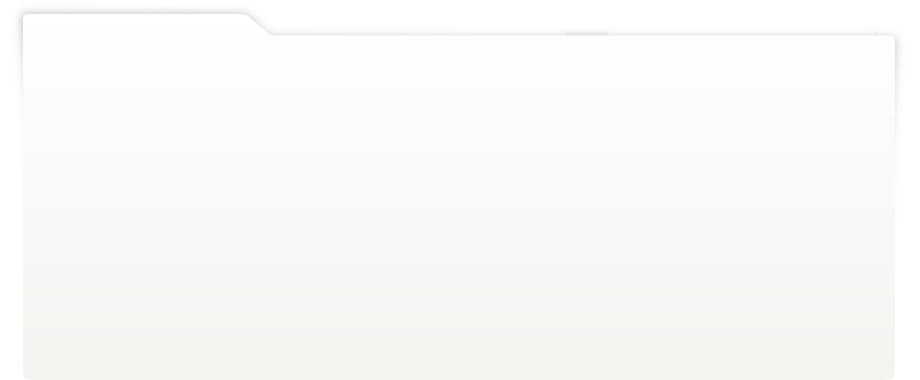
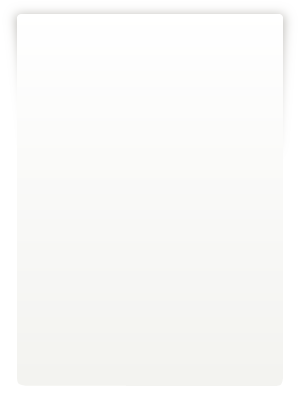
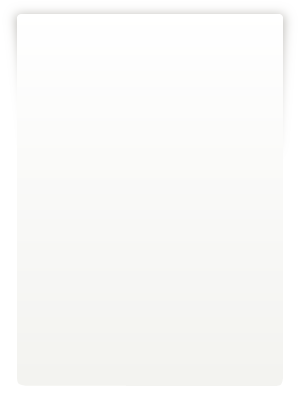
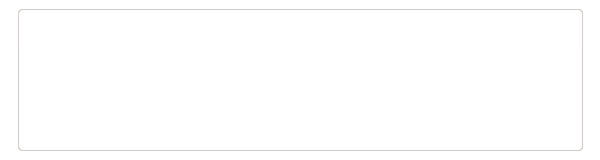
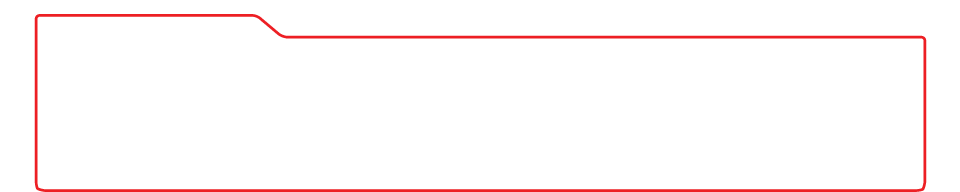
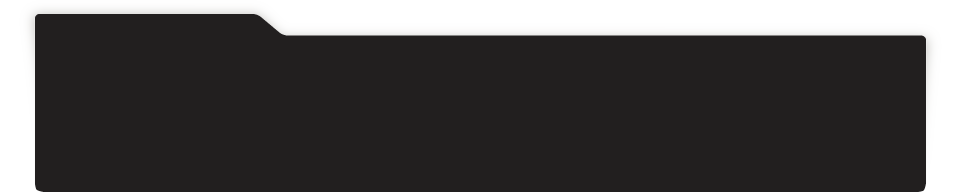
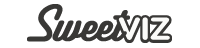
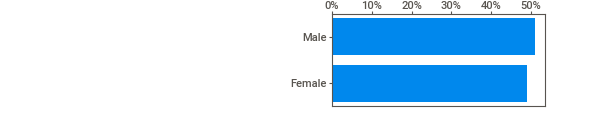
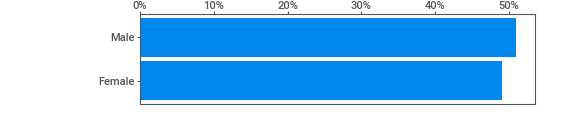
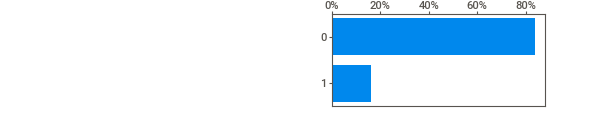
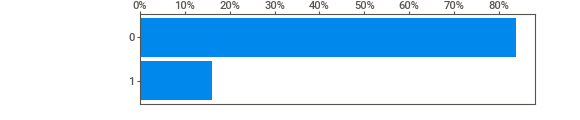
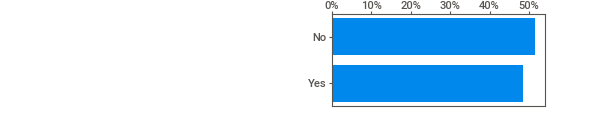
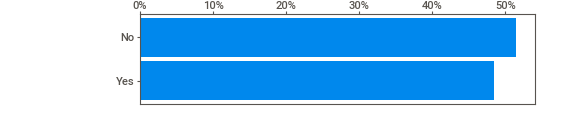
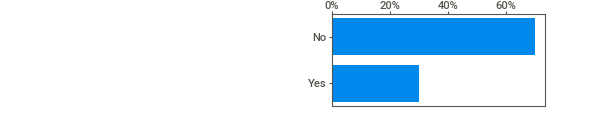
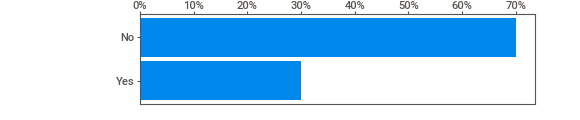
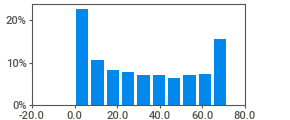
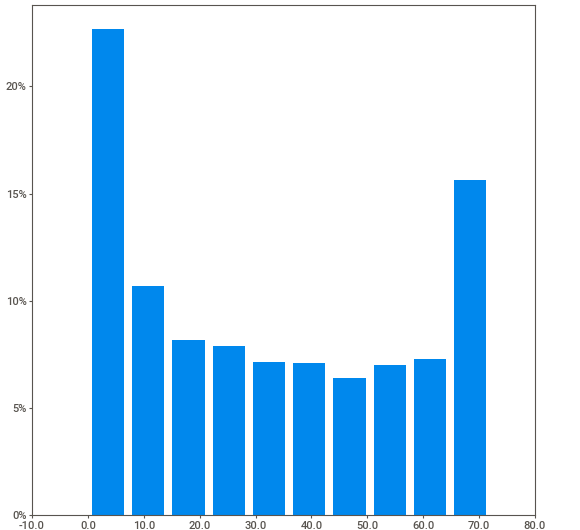
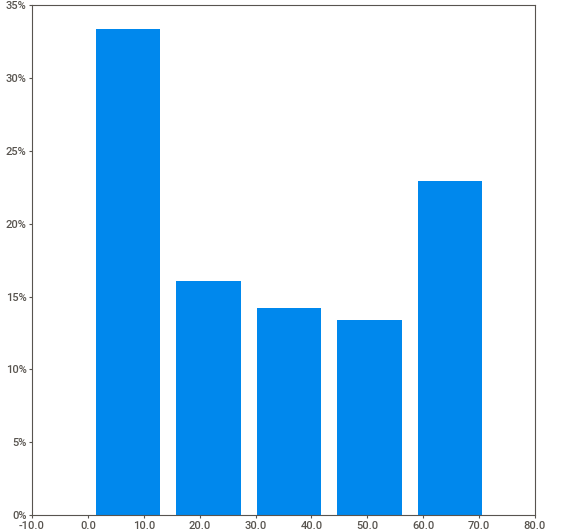
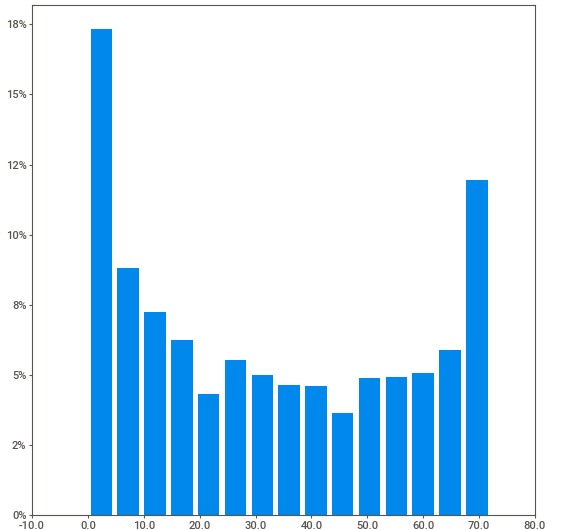
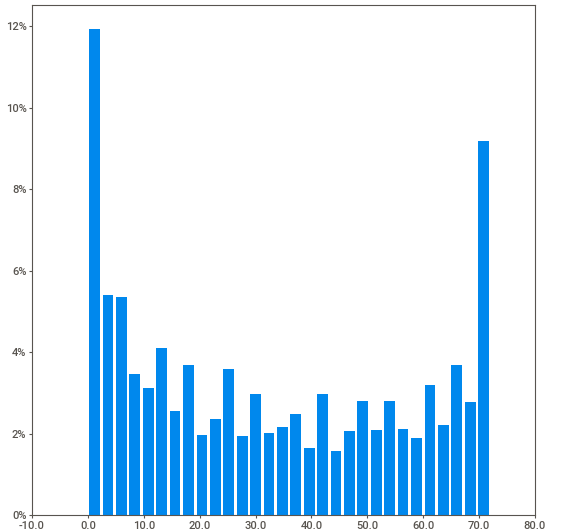
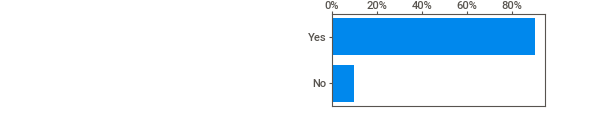
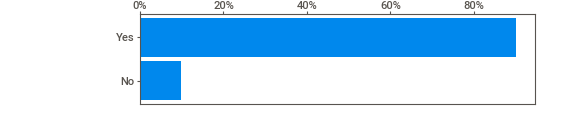
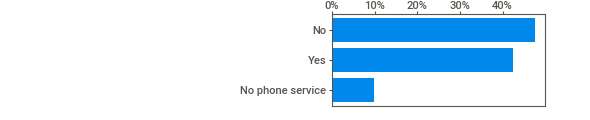
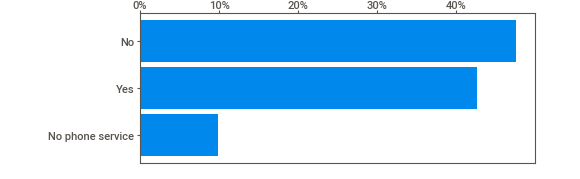
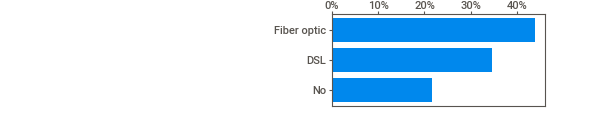
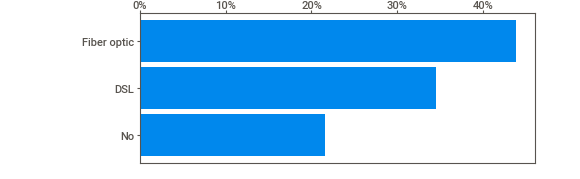
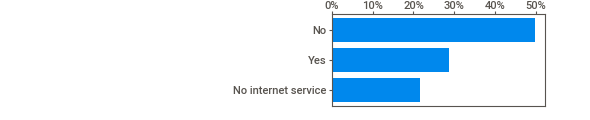
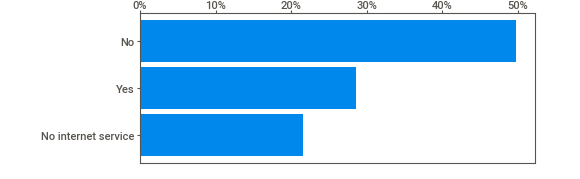
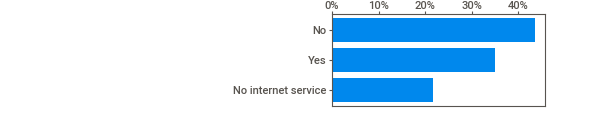
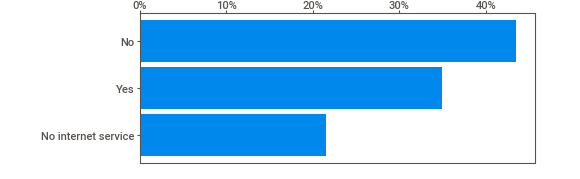
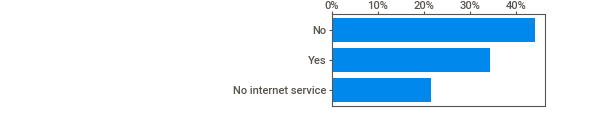
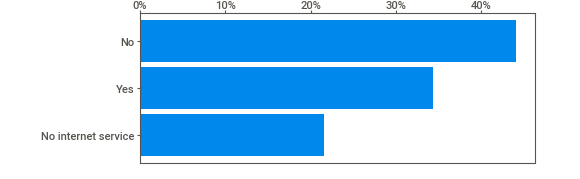
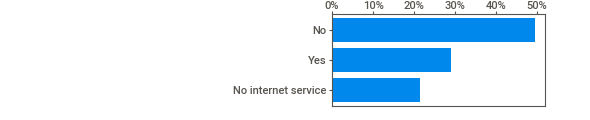
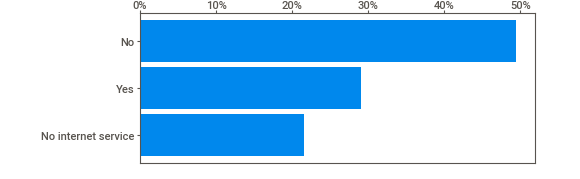
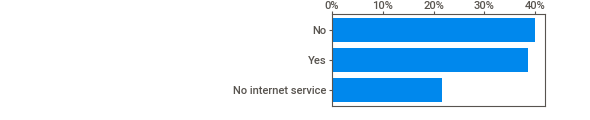
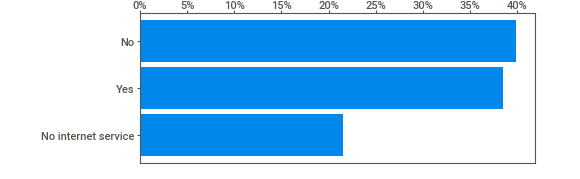
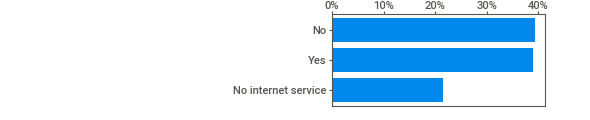
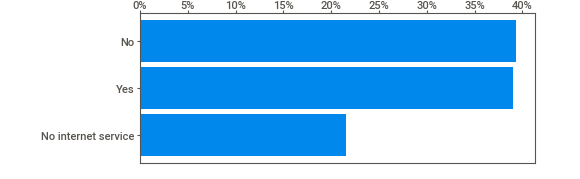
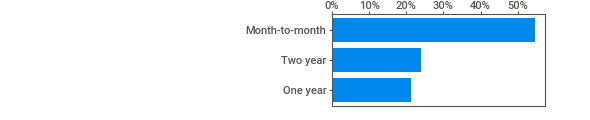
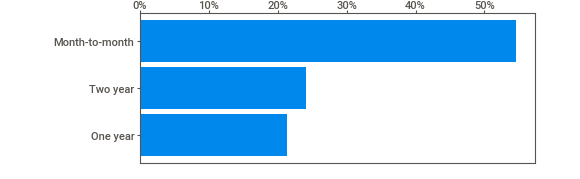
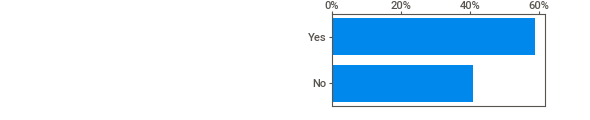
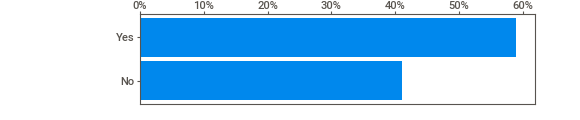
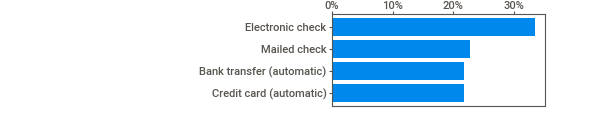
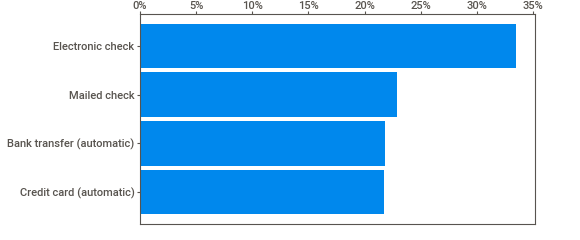
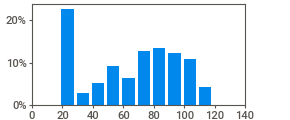
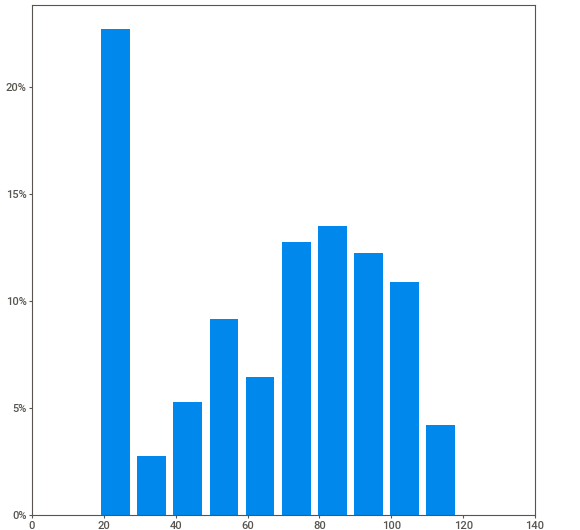
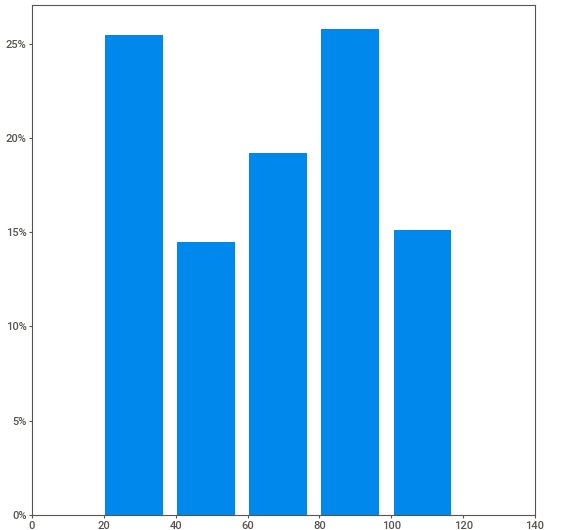
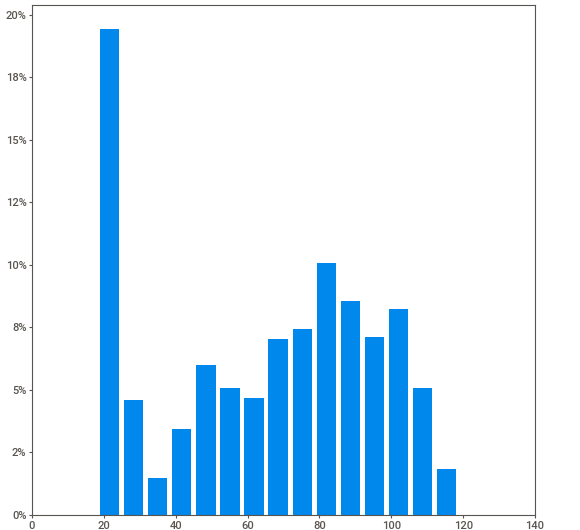
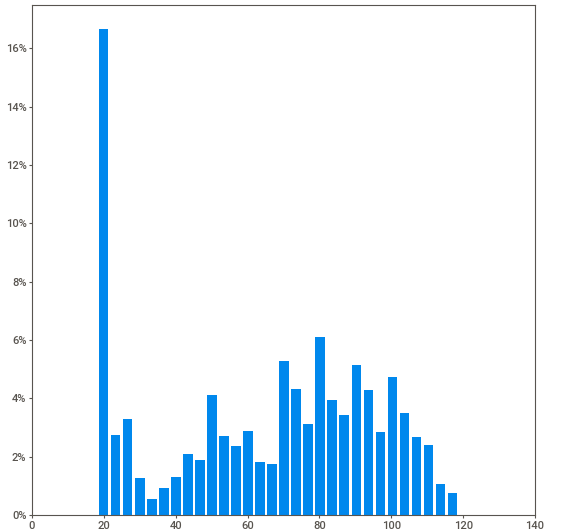
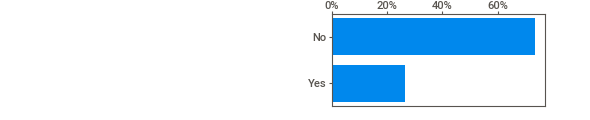
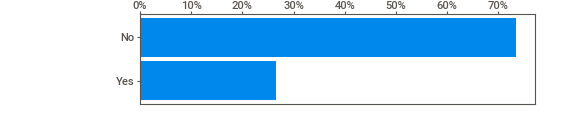
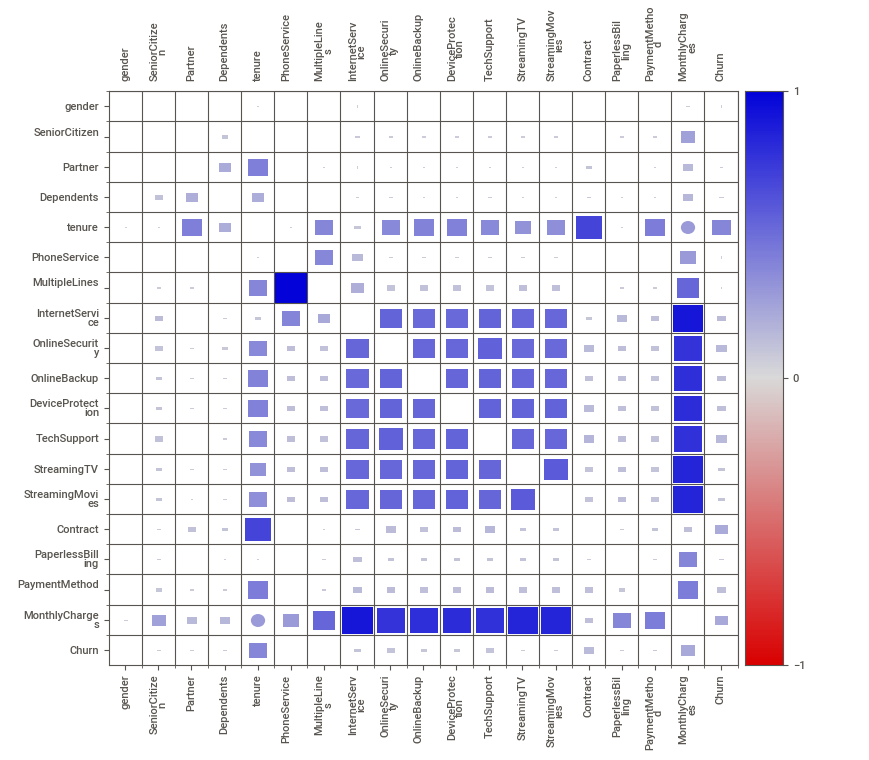
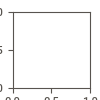

In [4]:
# initial EDA with simlified tool
telco_eda = sv.analyze( telco_df)
telco_eda.show_notebook()

# Observations and Analysis

- From the summary above, it can be seen that most of the columns are categorical. This means that feature engineering is needed to encode the categorical variables to appropriate numerical variables for easier interpretation by ML Models

- The target variable, churn, is unbalanced with 73% of the records being NO churn. There is possibility of model bias that may need to be investigated.

- A larger percentage(55%) of the customers have a short term month to month contract. This may be a reason for churn since if they are not commited, like the 21% that have annual contracts, they can just wait till end of monthly contract and just leave

- 84% of the customers are NOT senior citizens and hence, a younger population. With this information, the client may know how to better position their branding and marketing

- 70% of the customers do not have dependents. This, together with data points on senior citizen distribution, paints a picture of the main userbase for the telco client. The majority are most likely young and youthful people with No dependants.

 - A vast majority are not using extra services
1. Online security -50%
2. Online backup -44%
3. Device protection -44%
4. Tech support -49%


- Streaming services TV(40% No and 39% YES) and Movies (39% YES and 39% NO) are almost split down the middle. There is almost an equal number of people using this service as people not using it. There is however a smaller percentage, approximately 20% that does not have internet services


The above indicates very low usage of services offered by the Telco. The client should therefore reconsider their operations and service offering.

In [5]:
# setup ML with pycaret
from pycaret.classification import *
setup_1 = setup(telco_df, target='Churn',ignore_features=['customerID'])

,Description,Value
0,session_id,7386
1,Target,Churn
2,Target Type,Binary
3,Label Encoded,"No: 0, Yes: 1"
4,Original Data,"(5986, 21)"
5,Missing Values,False
6,Numeric Features,2
7,Categorical Features,17
8,Ordinal Features,False
9,High Cardinality Features,False


# Effective Model Comparison

The question of effective model comparison is solved by Pycaret's 
`compare_models()` function that ranks different classification algorithms based on a certain sort criteria. It could be recall, AUC or accuracy etc.
The function also allows you to define a list of algorithms you wish to compare. 

To increase the effectiveness of this comparison function, it is imperative to perform feature engineering on the data for the best possible results

In [6]:
best = compare_models(sort='Accuracy')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8031,0.8444,0.5008,0.6896,0.5794,0.4552,0.4656,14.988
lr,Logistic Regression,0.7971,0.8381,0.5378,0.6540,0.5893,0.4565,0.4609,22.531
ada,Ada Boost Classifier,0.7940,0.8404,0.5193,0.6518,0.5773,0.4436,0.4490,4.210
ridge,Ridge Classifier,0.7905,0.0000,0.5044,0.6464,0.5660,0.4308,0.4369,1.711
lightgbm,Light Gradient Boosting Machine,0.7900,0.8215,0.5334,0.6348,0.5793,0.4408,0.4440,0.546
rf,Random Forest Classifier,0.7890,0.8178,0.4832,0.6495,0.5537,0.4195,0.4276,5.519
et,Extra Trees Classifier,0.7773,0.8070,0.4745,0.6168,0.5361,0.3929,0.3989,9.616
knn,K Neighbors Classifier,0.7702,0.7755,0.5369,0.5837,0.5588,0.4039,0.4049,2.726
dt,Decision Tree Classifier,0.7637,0.6877,0.5159,0.5719,0.5418,0.3833,0.3847,0.595
svm,SVM - Linear Kernel,0.7289,0.0000,0.4696,0.3736,0.4034,0.2736,0.2879,2.796


In [14]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

# Business Question 2
What are the top determinants of Churn?
From the above visualization, the feature importance plot, it can be observed that the following features

1. Contract- Month-to-Month
2. Tenure
3. Online Security (NO)

# Grouping and Visualizations
 
 This visualization technique will help answer question 3. Within the features, what is the distribution of churn among the sub categories?
 The main trick is to use pandas `groupby()` and `unstack()`

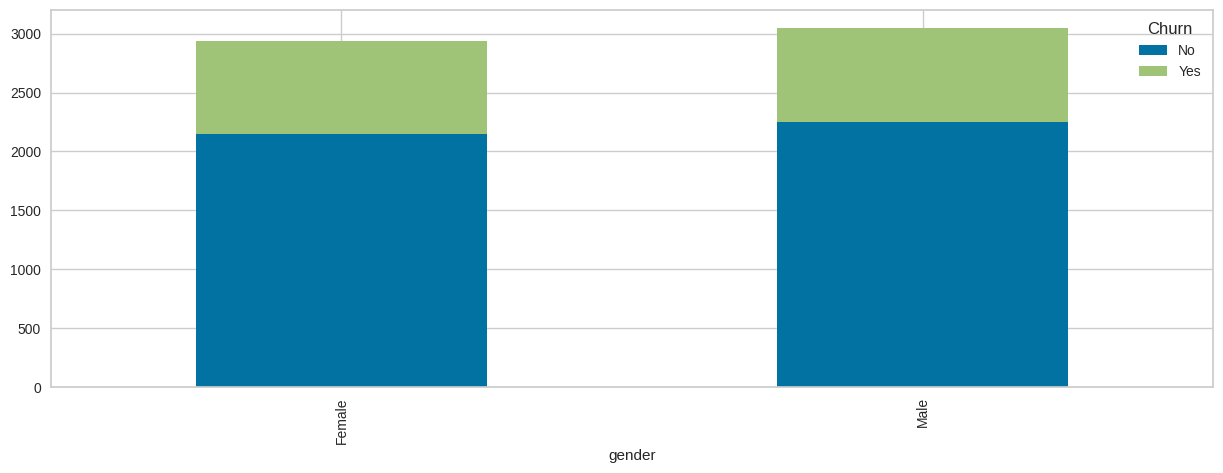

In [9]:
import matplotlib.pyplot as plt
# Group by Gender
fig, ax = plt.subplots(figsize=(15,5))
telco_df.groupby(['Churn','gender'])['Churn'].count().unstack('Churn').plot(kind='bar',stacked=True,ax=ax)

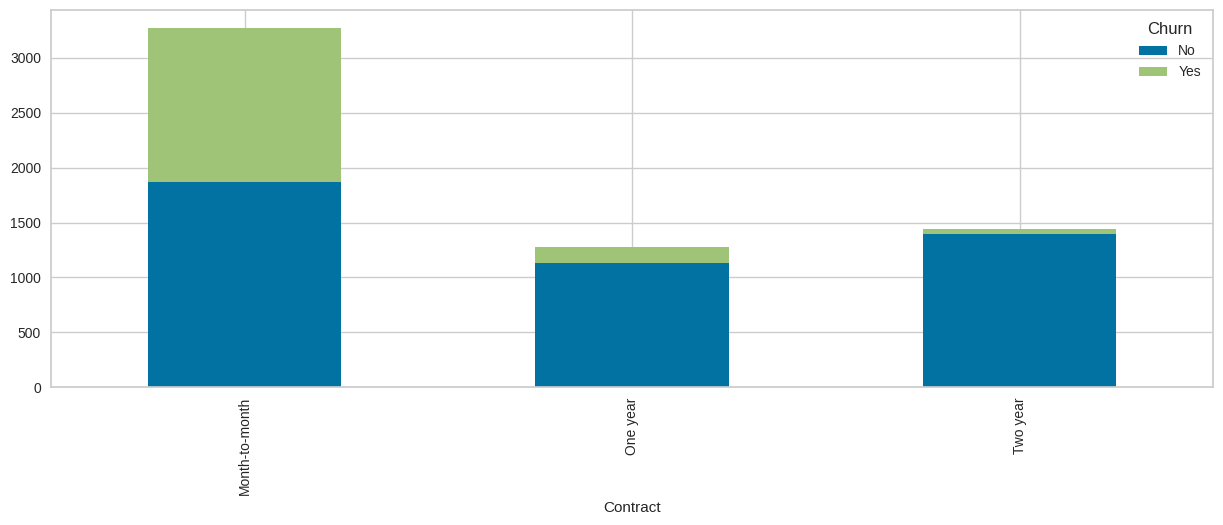

In [10]:
# Group by Contract
fig, ax = plt.subplots(figsize=(15,5))
telco_df.groupby(['Churn','Contract'])['Churn'].count().unstack('Churn').plot(kind='bar',stacked=True,ax=ax)

# Observation.
In the above visualization, the month-to-month contract type has the highest rate of churn. This makes sense since there is little commitment, these customers would find it easiest to leave.

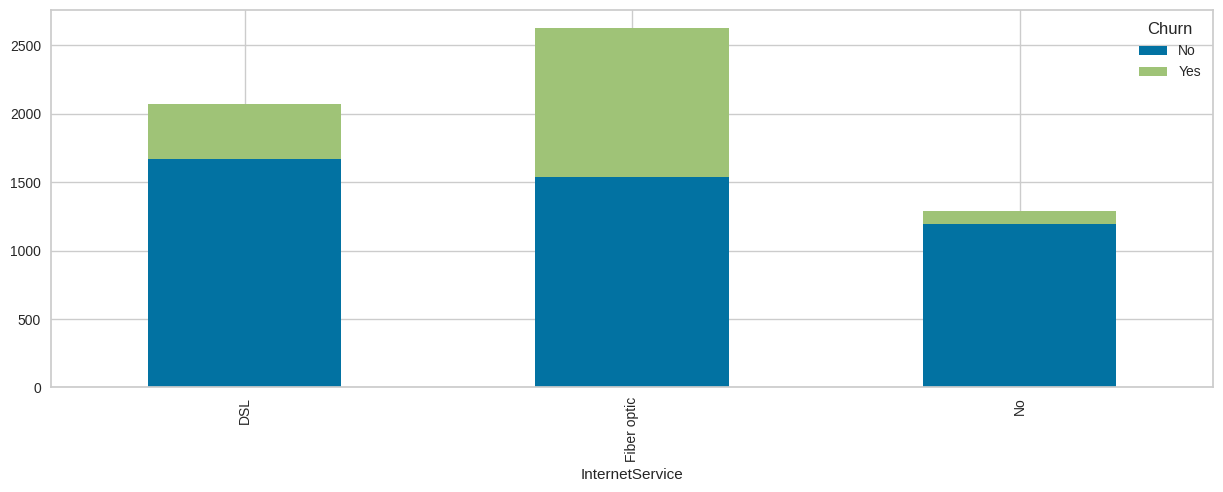

In [11]:
# Group by InternetService
fig, ax = plt.subplots(figsize=(15,5))
telco_df.groupby(['Churn','InternetService'])['Churn'].count().unstack('Churn').plot(kind='bar',stacked=True,ax=ax)

# Feature Engineering

Use of feature engineering techniques for better results

In [12]:
# Convert YES and NO strings to boolean values
def convert_to_bool(val):
  if val == 'Yes':
    return 1
  else: # you are simply either using the service or are not
    return 0

columns_for_conversion = ['Partner','PaperlessBilling',
       'Dependents', 'PhoneService', 'MultipleLines',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies']

for item in columns_for_conversion:
  telco_df[item] = telco_df[item].apply(lambda val: convert_to_bool(val))
telco_df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7010-BRBUU,Male,0,1,1,72,1,1,No,0,0,0,0,0,0,Two year,0,Credit card (automatic),24.10,1734.65,No
1,9688-YGXVR,Female,0,0,0,44,1,0,Fiber optic,0,1,1,0,1,0,Month-to-month,1,Credit card (automatic),88.15,3973.2,No
2,9286-DOJGF,Female,1,1,0,38,1,1,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Bank transfer (automatic),74.95,2869.85,Yes
3,6994-KERXL,Male,0,0,0,4,1,0,DSL,0,0,0,0,0,1,Month-to-month,1,Electronic check,55.90,238.5,No
4,2181-UAESM,Male,0,0,0,2,1,0,DSL,1,0,1,0,0,0,Month-to-month,0,Electronic check,53.45,119.5,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5981,0684-AOSIH,Male,0,1,0,1,1,0,Fiber optic,1,0,0,0,1,1,Month-to-month,1,Electronic check,95.00,95,Yes
5982,5982-PSMKW,Female,0,1,1,23,1,1,DSL,1,1,1,1,1,1,Two year,1,Credit card (automatic),91.10,2198.3,No
5983,8044-BGWPI,Male,0,1,1,12,1,0,No,0,0,0,0,0,0,Month-to-month,1,Electronic check,21.15,306.05,No
5984,7450-NWRTR,Male,1,0,0,12,1,1,Fiber optic,0,0,1,0,1,1,Month-to-month,1,Electronic check,99.45,1200.15,Yes


In [13]:
# get dummies for categorical variables
dummy_encoded_telco_df = pd.get_dummies(telco_df, columns = ['InternetService','Contract','gender','PaymentMethod'])
dummy_encoded_telco_df

,customerID,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,gender_Female,gender_Male,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7010-BRBUU,0,1,1,72,1,1,0,0,0,0,0,0,0,24.10,1734.65,No,0,0,1,0,0,1,0,1,0,1,0,0
1,9688-YGXVR,0,0,0,44,1,0,0,1,1,0,1,0,1,88.15,3973.2,No,0,1,0,1,0,0,1,0,0,1,0,0
2,9286-DOJGF,1,1,0,38,1,1,0,0,0,0,0,0,1,74.95,2869.85,Yes,0,1,0,1,0,0,1,0,1,0,0,0
3,6994-KERXL,0,0,0,4,1,0,0,0,0,0,0,1,1,55.90,238.5,No,1,0,0,1,0,0,0,1,0,0,1,0
4,2181-UAESM,0,0,0,2,1,0,1,0,1,0,0,0,0,53.45,119.5,No,1,0,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5981,0684-AOSIH,0,1,0,1,1,0,1,0,0,0,1,1,1,95.00,95,Yes,0,1,0,1,0,0,0,1,0,0,1,0
5982,5982-PSMKW,0,1,1,23,1,1,1,1,1,1,1,1,1,91.10,2198.3,No,1,0,0,0,0,1,1,0,0,1,0,0
5983,8044-BGWPI,0,1,1,12,1,0,0,0,0,0,0,0,1,21.15,306.05,No,0,0,1,1,0,0,0,1,0,0,1,0
5984,7450-NWRTR,1,0,0,12,1,1,0,0,1,0,1,1,1,99.45,1200.15,Yes,0,1,0,1,0,0,0,1,0,0,1,0


In [15]:
# save model for later load and use
save_model(best,'best_model_2021-03-18-0800')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True,
                                       features_todrop=['customerID'],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='Churn',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 nu...
                                             learning_rate=0.1, loss='deviance',
                                             max_depth=3, max_features=None,
                                             max_leaf_nodes=None,
           